#    Péndulo simple:resolución utilizando codigo simple y arreglos numpy                         


                            Programa hecho por Rafael Alejandro García Ramírez

Primero resolveremos el problema del péndulo simple utilizando el método de Euler como si fuera un código en C o Fortran 

## Código simple

In [1]:
# Importamos las librerías necesarias para graficar y resolver los datos dados por el problema.
import math as mh
import matplotlib.pyplot as plt 



Ahora inciaremos nuestras funciones y nuestras variables con los valores siguientes(a excepción de g claro, aunque también podría ser)

In [22]:
g=9.81                #Constrante gravitacional
l=1                   #longitud en metros
w=mh.sqrt(g/l)        #Constante definida
# Definimos nuestras funciones que serán las ecuaciones diferenciales que resolveremos
def fx(t,vy):        
    return vy
def gx(t,th):
    return -(w**2)*th

    
#Declaración de parámetros 
a=0                   # Extremo a 
b=15                  # Extremo b
hat=0.001             # Hat me hace más divertida la idea de programar.
n=10000               # Constante cualquiera que usaremos
t=0                   # Tiempo inicial
th1=mh.pi/2           # Ángulo inicial
vy1=0                 # Velocidad inicial


Ya definido todos los elementos que necesitamos para la receta, pasaremos a la parte de los ciclos donde se harán los cálculos respectivos

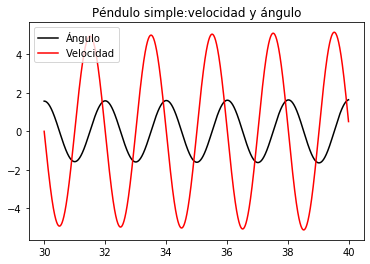

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 17.2 µs


In [26]:
#Creo una lista para cada valor permitiéndo que el programa escriba dentro de cada valor.
t = [0 for i in range(n)]
vy= [0 for i in range(len(t))]
th= [0 for i in range(len(t))]

#Ahora hacemos que la lista de t crezca hasta b, indicando una sucesión de tiempo con intervalos definidos.
for i in range(n):
    t[i] = a   #Utilizo 'a' dado que a es un valor constante que no se modificará y tiene el valor que buscamos.
    a = a + hat
#NOTA: si bien utilicé 'a' por su valor incial cero, cuando nuestro extremo 'a' no es de valor cero, deberemos 
#         definir una nueva constante con valor cero para el trabajo.
         

# Ahora definimos los valores iniciales de vy y th dentro de sus respectivas listas.
vy[0]=vy1
th[0]=th1

# Iniciamos el ciclo para realizar finalmente los cálculos del método de Euler
for i in range (n-1):
    th[i+1] = th[i] + fx(t[i],vy[i])*hat
    vy[i+1] = vy[i] + gx(t[i],th[i])*hat
    #print(th,vy)  #Dado que la lista (tabla) es muuuuy larga,si desea la tabla, quite el # de comentario.

#Grafico los resultados
plt.plot(t,th,'k-',label='Ángulo')
plt.plot(t,vy,'r-',label='Velocidad')
plt.title("Péndulo simple:velocidad y ángulo")
plt.legend()
plt.show()
%time

Ahora resolveremos el mismo problema con arreglos numpy

# Arreglos Numpy

Ahora resolveremos el mismo problema utilizando arreglos numpy que resolverán el problema de manera ligeramente 
distinta.

In [4]:
# Declaramos la librería numpy
import numpy as np

Ahora inciaremos nuestras funciones y nuestras variables con los valores siguientes(a excepción de g claro, aunque también podría ser):

In [20]:
g=9.81                #Constrante gravitacional
l=1                   #longitud en metros
w=np.sqrt(g/l)        #Constante definida
# Definimos nuestras funciones que serán las ecuaciones diferenciales que resolveremos
def fx(t,vy):        
    return vy
def gx(t,th):
    return -(w**2)*th

    
#Declaración de parámetros 
a=0                   #Extremo a 
b=15                  #Extremo b
hat=0.001
t=0                   # Tiempo inicial
th1=np.pi/2           # Ángulo inicial
vy1=0                 # Velocidad inicial

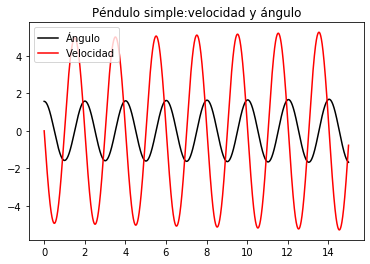

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 15.5 µs


In [21]:
# Para t asignaremos una lista desde a hasta b con intervalos, ésto con ayuda de arange que directamente lo crea.
t =np.arange(a,b,hat)
# # # # # # # 
# Aquí inician los cambios, ahora creamos las listas para th y vh llenas de ceros.
th = np.zeros(len(t))
vy = np.zeros(len(t))
# Ahora definimos los valores iniciales de vy y th dentro de sus respectivas listas.
vy[0]=vy1
th[0]=th1
# Iniciamos el ciclo para realizar finalmente los cálculos del método de Euler
for i in range (len(t)-1):
    th[i+1] = th[i] + fx(t[i],vy[i])*hat
    vy[i+1] = vy[i] + gx(t[i],th[i])*hat
    #print(th,vy)  #Dado que la lista (tabla) es muuuuy larga,si desea la tabla, quite el # de comentario.
# Graficamos lso resultados.
plt.plot(t,th,'k-',label='Ángulo')
plt.plot(t,vy,'r-',label='Velocidad')
plt.title("Péndulo simple:velocidad y ángulo")
plt.legend()
plt.show()
%time

# Extra: solución analítica usando python

Dado a que no sabía qué tan válido es utilizar éste recurso para resolver EDO y para resolver ésta ecuación, decidí anadirlo como extra, dado que si bien no es utilizar arreglos numpy, es también un método sencillo. Para ésto, hago uso de la librería sympy.

In [7]:
import sympy 
# Permito que el programa imprima con notación matemática, en éste caso LaTeX
sympy.init_printing(use_latex='mathjax')  

In [8]:
# Defino las variables con las que quiero que el programa imprima.
t = sympy.symbols("t", positive=True)
O = sympy.Function("O")
w = sympy.symbols("w",positive=True)
# Defino la ecuación del péndulo simple.
edo = O(t).diff(t, t)+(w**2)*O(t)
# Imprimo la ecuación solo como seguro de que python entiende qué ecuación resolveremos
sympy.Eq(edo,0)

            2          
 2         d           
w ⋅O(t) + ───(O(t)) = 0
            2          
          dt           

In [9]:
#Solucionamos la expresión
%time sympy.dsolve(edo)


CPU times: user 1.03 s, sys: 1.91 ms, total: 1.03 s
Wall time: 1.12 s


O(t) = C₁⋅sin(t⋅w) + C₂⋅cos(t⋅w)

# Comparación de datos y discusiones.

Desde luego que se puede notar en las diferencias en el tiempo que toma computar cada código, siendo desde luego el código de los arreglos numpy el más rápido, dado a que no necesita crear las listas y luego llenarlas con los respectivos datos para comenzar el ciclo como lo hace el código simple. Las herramientas que provee la librería numpy son a mi parecer bien pensados y diseñados justamente para éste proposito y sobre todo pensando en que se sacará ventaja de ello para códigos mucho más grandes o que cuyo tiempo de ejecución sea mucho más largo(hasta meses!), ahorrando tiempo primordial para los investigadores o usarios que buscan un resultado en concreto para trabajar con el. 